<a href="https://colab.research.google.com/github/Sabirbinsakander/-data-science/blob/main/2_3_Ansemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score


In [8]:
url='https://raw.githubusercontent.com/Rubaiya-Razin/Data-Science-Course/refs/heads/main/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
#Define target/dependent and independent variable
X = df.drop(['species'],axis=1)
y = df['species']

In [9]:
from sklearn.ensemble import AdaBoostClassifier

#split train_test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
AdaModel = AdaBoostClassifier(n_estimators=150, learning_rate=1)
model = AdaModel.fit(X_train, y_train)

In [11]:
from sklearn.metrics import classification_report, accuracy_score
prediction = AdaModel.predict(X_test)
print('Classification Report:\n', classification_report(y_test, prediction))
print('Accuracy Score:', accuracy_score(y_test, prediction))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      0.88      0.86        17
   virginica       0.83      0.77      0.80        13

    accuracy                           0.89        45
   macro avg       0.89      0.88      0.89        45
weighted avg       0.89      0.89      0.89        45

Accuracy Score: 0.8888888888888888


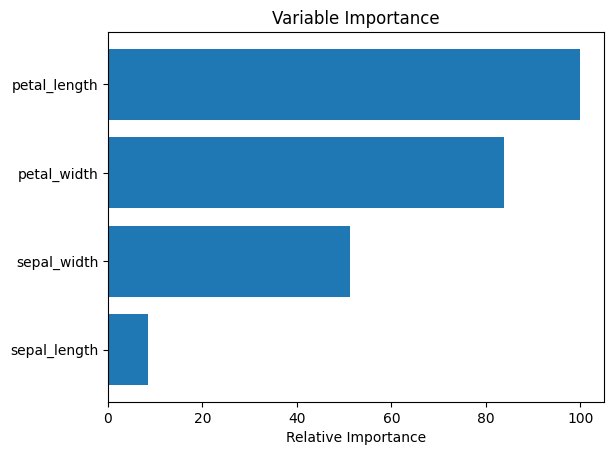

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

#Plot feature importance
feature_importance = AdaModel.feature_importances_
#make importances relative to max importances
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [13]:
pip install --upgrade scikit-learn

In [15]:
#import pandas as pd # Needed for df
from sklearn.svm import SVC
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.metrics import classification_report, accuracy_score
#from sklearn.model_selection import train_test_split # Needed for train_test_split

# Data loading and preparation (copied from previous cells to resolve NameError)
url='https://raw.githubusercontent.com/Rubaiya-Razin/Data-Science-Course/refs/heads/main/iris.csv'
df = pd.read_csv(url)
X = df.drop(['species'],axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


#Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics # This import is redundant if functions are imported directly
svc = SVC (probability = True, kernel='linear')

#create adaboost classifer object
abcSV = AdaBoostClassifier(n_estimators=100, estimator=svc,learning_rate=1)
modelSVC = abcSV.fit(X_train, y_train)
predictionsSVM = modelSVC.predict(X_test)

print('Classification Report:\n', classification_report(y_test, predictionsSVM))
print('Accuracy Score:', accuracy_score(y_test, predictionsSVM))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.72      1.00      0.84        13
   virginica       1.00      0.71      0.83        17

    accuracy                           0.89        45
   macro avg       0.91      0.90      0.89        45
weighted avg       0.92      0.89      0.89        45

Accuracy Score: 0.8888888888888888


In [17]:
#Gradeint boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

#load iris dataset
url = 'https://raw.githubusercontent.com/Rubaiya-Razin/Data-Science-Course/refs/heads/main/iris.csv'
df = pd.read_csv(url)
df.head()

#Define target/define and independent variable
X = df.drop(['species'],axis=1)
y = df['species']

#split train_test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#train Gradient Boosting model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

#Evalute model
accuracy  = gb_clf.score(X_test, y_test)
print(f"Gradient Boosting Accuracy: {accuracy:.2f}")

Gradient Boosting Accuracy: 0.93


In [18]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#load hebarman data set
url = 'https://raw.githubusercontent.com/Rubaiya-Razin/Data-Science-Course/refs/heads/main/Heberman.csv'
df = pd.read_csv(url)
df.head()

,age,operation_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [19]:
#Define target/dependent and independent variable
feautures = ['age', 'operation_year', 'axil_nodes']
X = df[feautures]
df['status'] = df['status'].map({1 : 0, 2 : 1})
y = df['status']

In [24]:
#Enconde categorical target variable into numerical labels if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train XGboost model
model = xgb.XGBClassifier(n_estimators=100, learning_rate = 0.1, max_depth=3, random_state = 42)
model.fit(X_train, y_train)

#Evaluate model
accuracy = model.score(X_test, y_test)
print(f"XGBoost Accuracy:",accuracy)

XGBoost Accuracy: 0.7282608695652174
